**Problem Statement:-** 

The data here is for the "Census Income". This data is labeled with whether the person's yearly income is above or below $50K (and you are trying to model and predict this).

The data contains the following columns, along with a brief description of the data type (either "continuous" for numerical values, or a list of categorical values):

1)age: continuous.

2)workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3)fnlwgt: continuous.

4)education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5)education-num: continuous.

6)marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7)occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8)relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9)race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10)gender: Female, Male.

11)capital-gain: continuous.

12)capital-loss: continuous.

13)hours-per-week: continuous.

14)native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15)Output adult.data contains one additional column for the label, which is >50K if the person's yearly income is greater than $50K, and otherwise <=50K.

DATA VISUALIZATION IS DONE BY:-

1)Count plot

2)Histogram

3)Boxplot

4)Heatmap

5)Pairplot

Machine learning algorithm used:-

1)Logistic Regression

2)Decision Tree classifier

3)Bagging Classifier

4)Random Forest classifier

5)SGD Classifier

6)Gradient Boosting Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas import read_csv
from pandas.plotting import scatter_matrix

from numpy import mean
from numpy import std

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier


from sklearn import model_selection
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

# Importing dataset 

In [3]:
df = pd.read_csv('../../Data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Drop missing values

In [4]:
# drop rows with missing
df = df.dropna()

In [5]:
# summarize the shape of the dataset
print(df.shape)

(32561, 15)


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [8]:
df.isnull().values.any()

False

# Classifying on the basis of income 

0=more than 50k

1=less than 50k

In [9]:
df['income']=LabelEncoder().fit_transform(df['income'])

# count plot

1.Workclass

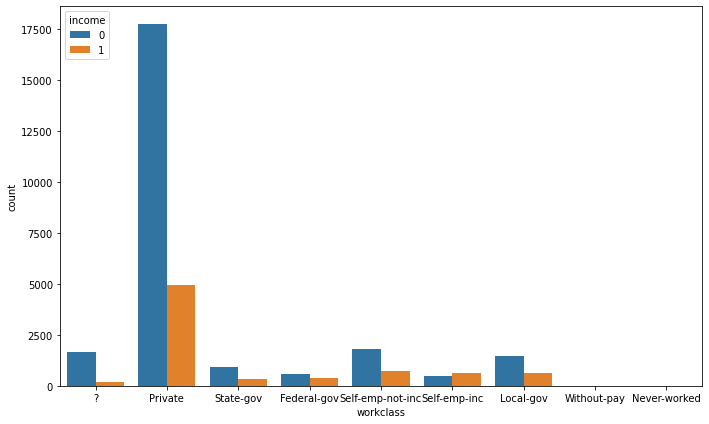

In [10]:
fig=plt.figure(figsize=(10,6))
sns.countplot('workclass',data=df,hue="income" )
plt.tight_layout()
plt.show()

2.Eduacation

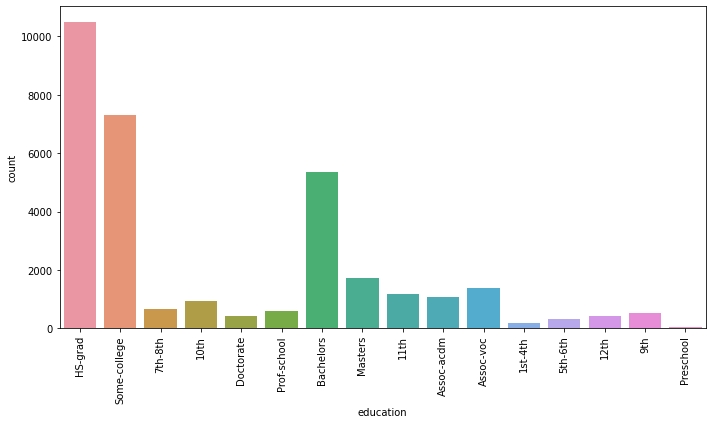

In [11]:
fig=plt.figure(figsize=(10,6))
sns.countplot('education',data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3.Marital Status 

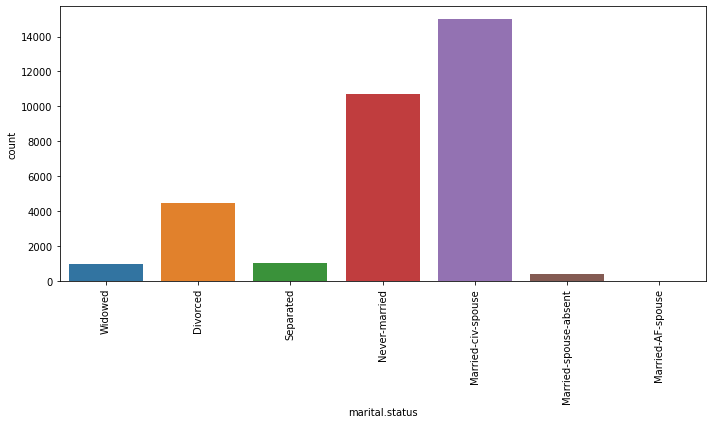

In [12]:
fig=plt.figure(figsize=(10,6))
sns.countplot('marital.status',data=df )
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4.Occupation 

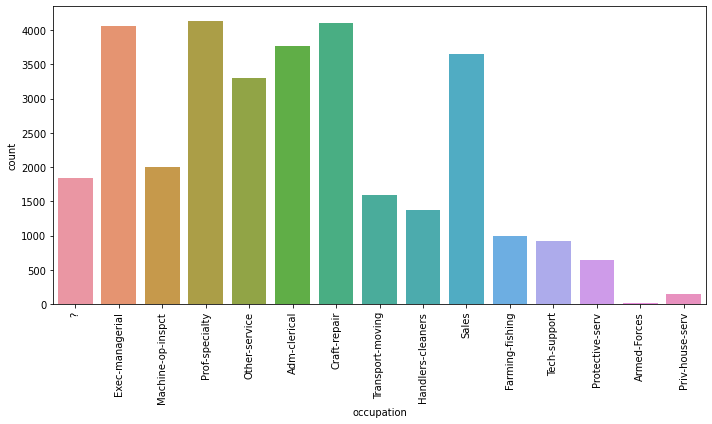

In [13]:
fig=plt.figure(figsize=(10,6))
sns.countplot('occupation',data=df )
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

5.sex

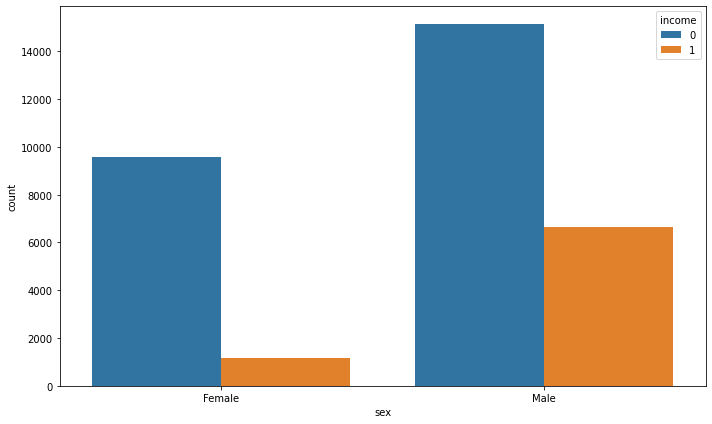

In [14]:
fig=plt.figure(figsize=(10,6))
sns.countplot('sex',data=df,hue="income")
plt.tight_layout()
plt.show()

6.Race

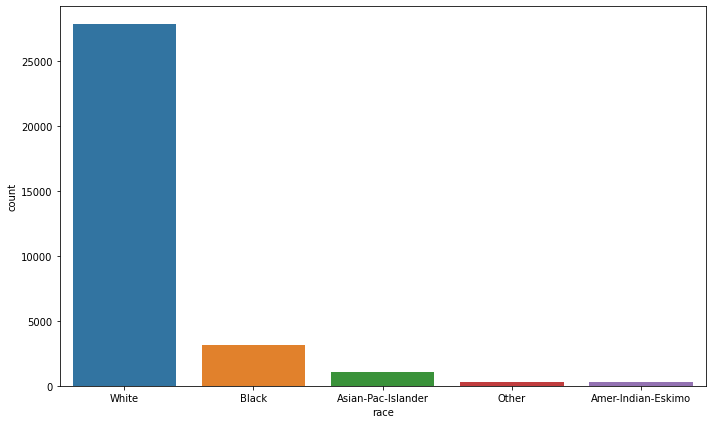

In [15]:
fig=plt.figure(figsize=(10,6))
sns.countplot('race',data=df )
plt.tight_layout()
plt.show()

7.Native Country

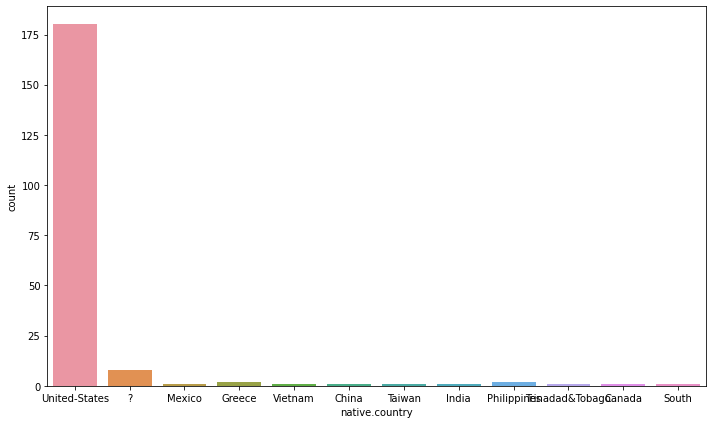

In [16]:
fig=plt.figure(figsize=(10,6))
sns.countplot('native.country',data=df.head(200) )
plt.tight_layout()
plt.show()

# Box plot 

Text(0.5, 0, 'age')

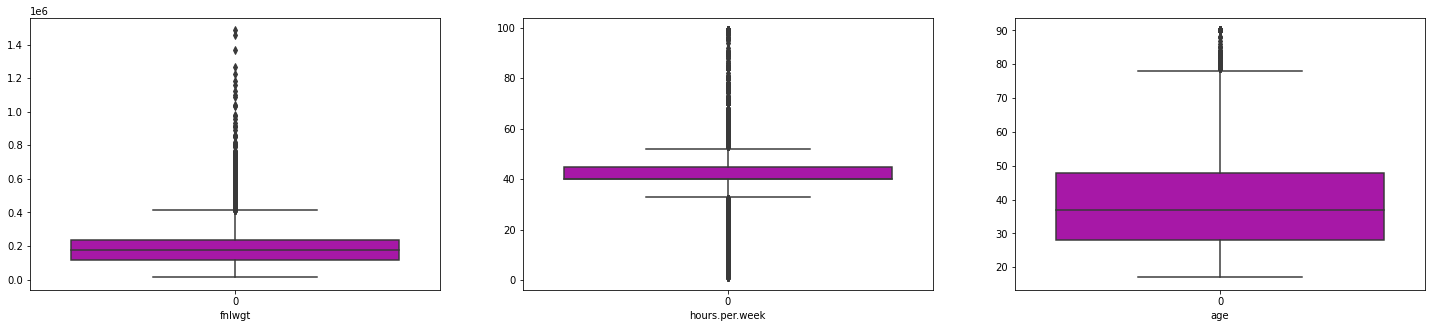

In [17]:
f,ax=plt.subplots(1,3,figsize=(25,5))
box1=sns.boxplot(data=df["fnlwgt"],ax=ax[0],color='m')
ax[0].set_xlabel('fnlwgt')
box1=sns.boxplot(data=df["hours.per.week"],ax=ax[1],color='m')
ax[1].set_xlabel('hours.per.week')
box1=sns.boxplot(data=df["age"],ax=ax[2],color='m')
ax[2].set_xlabel('age')

<AxesSubplot:xlabel='age', ylabel='sex'>

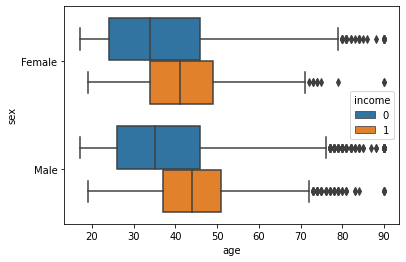

In [18]:
sns.boxplot(x="age",y="sex",hue="income",data=df)

# Heatmap 

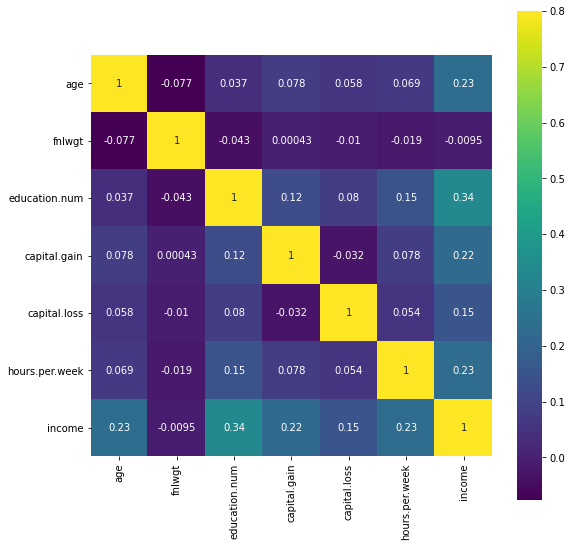

In [19]:
#df1= df.corr()
corr = (df.corr())
plt.subplots(figsize=(9, 9))
sns.heatmap(corr, vmax=.8,annot=True,cmap="viridis", square=True);

# Histograms of each features 

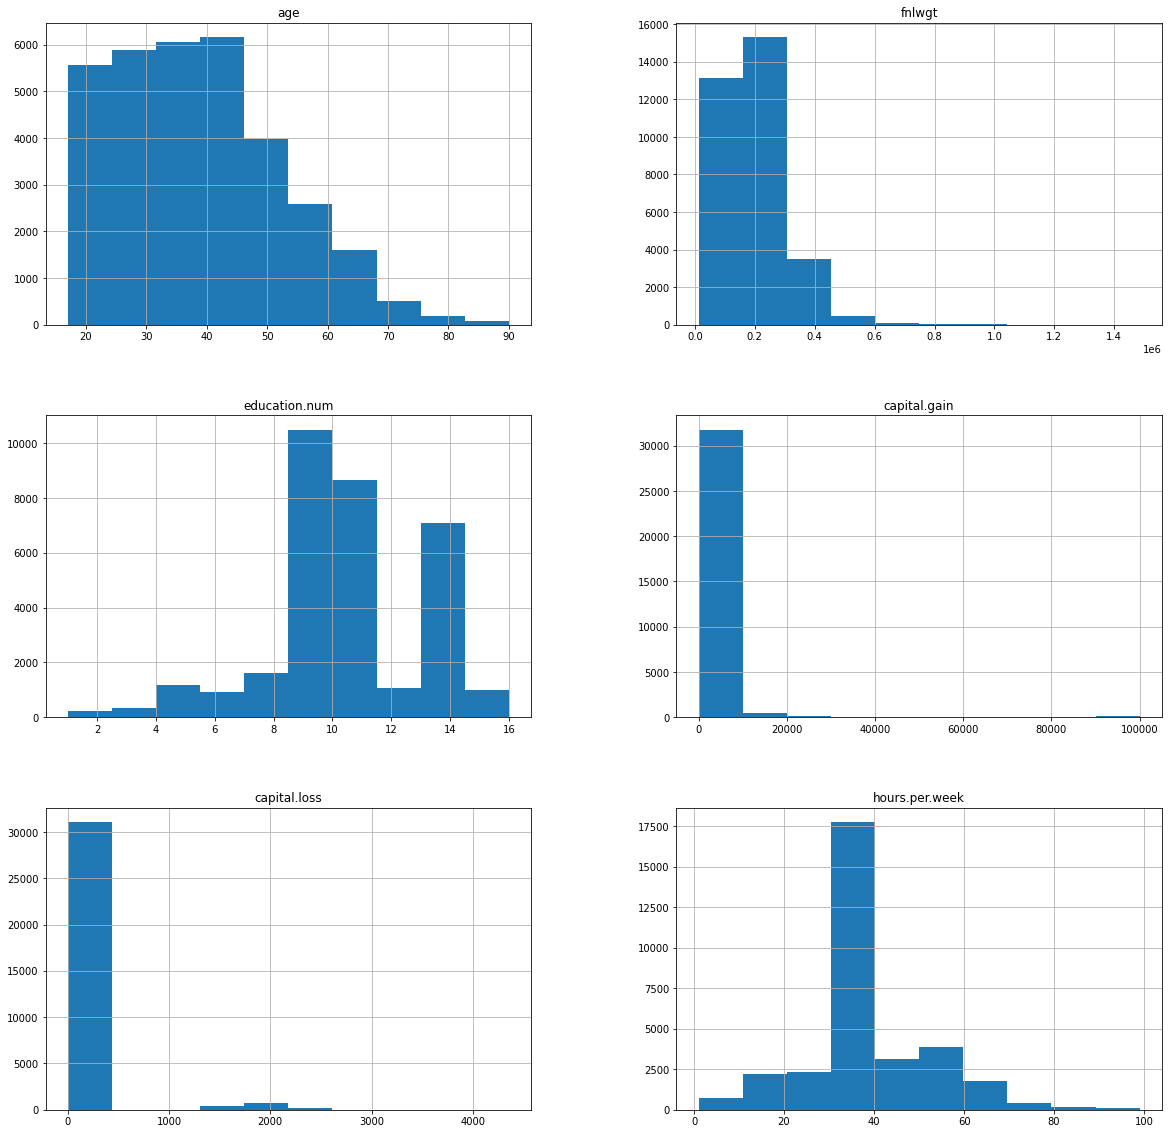

In [20]:
df1=df.drop(['income'],axis=1)
df1.hist (bins=10,figsize=(20,20))
plt.show ()

# Pairplot 

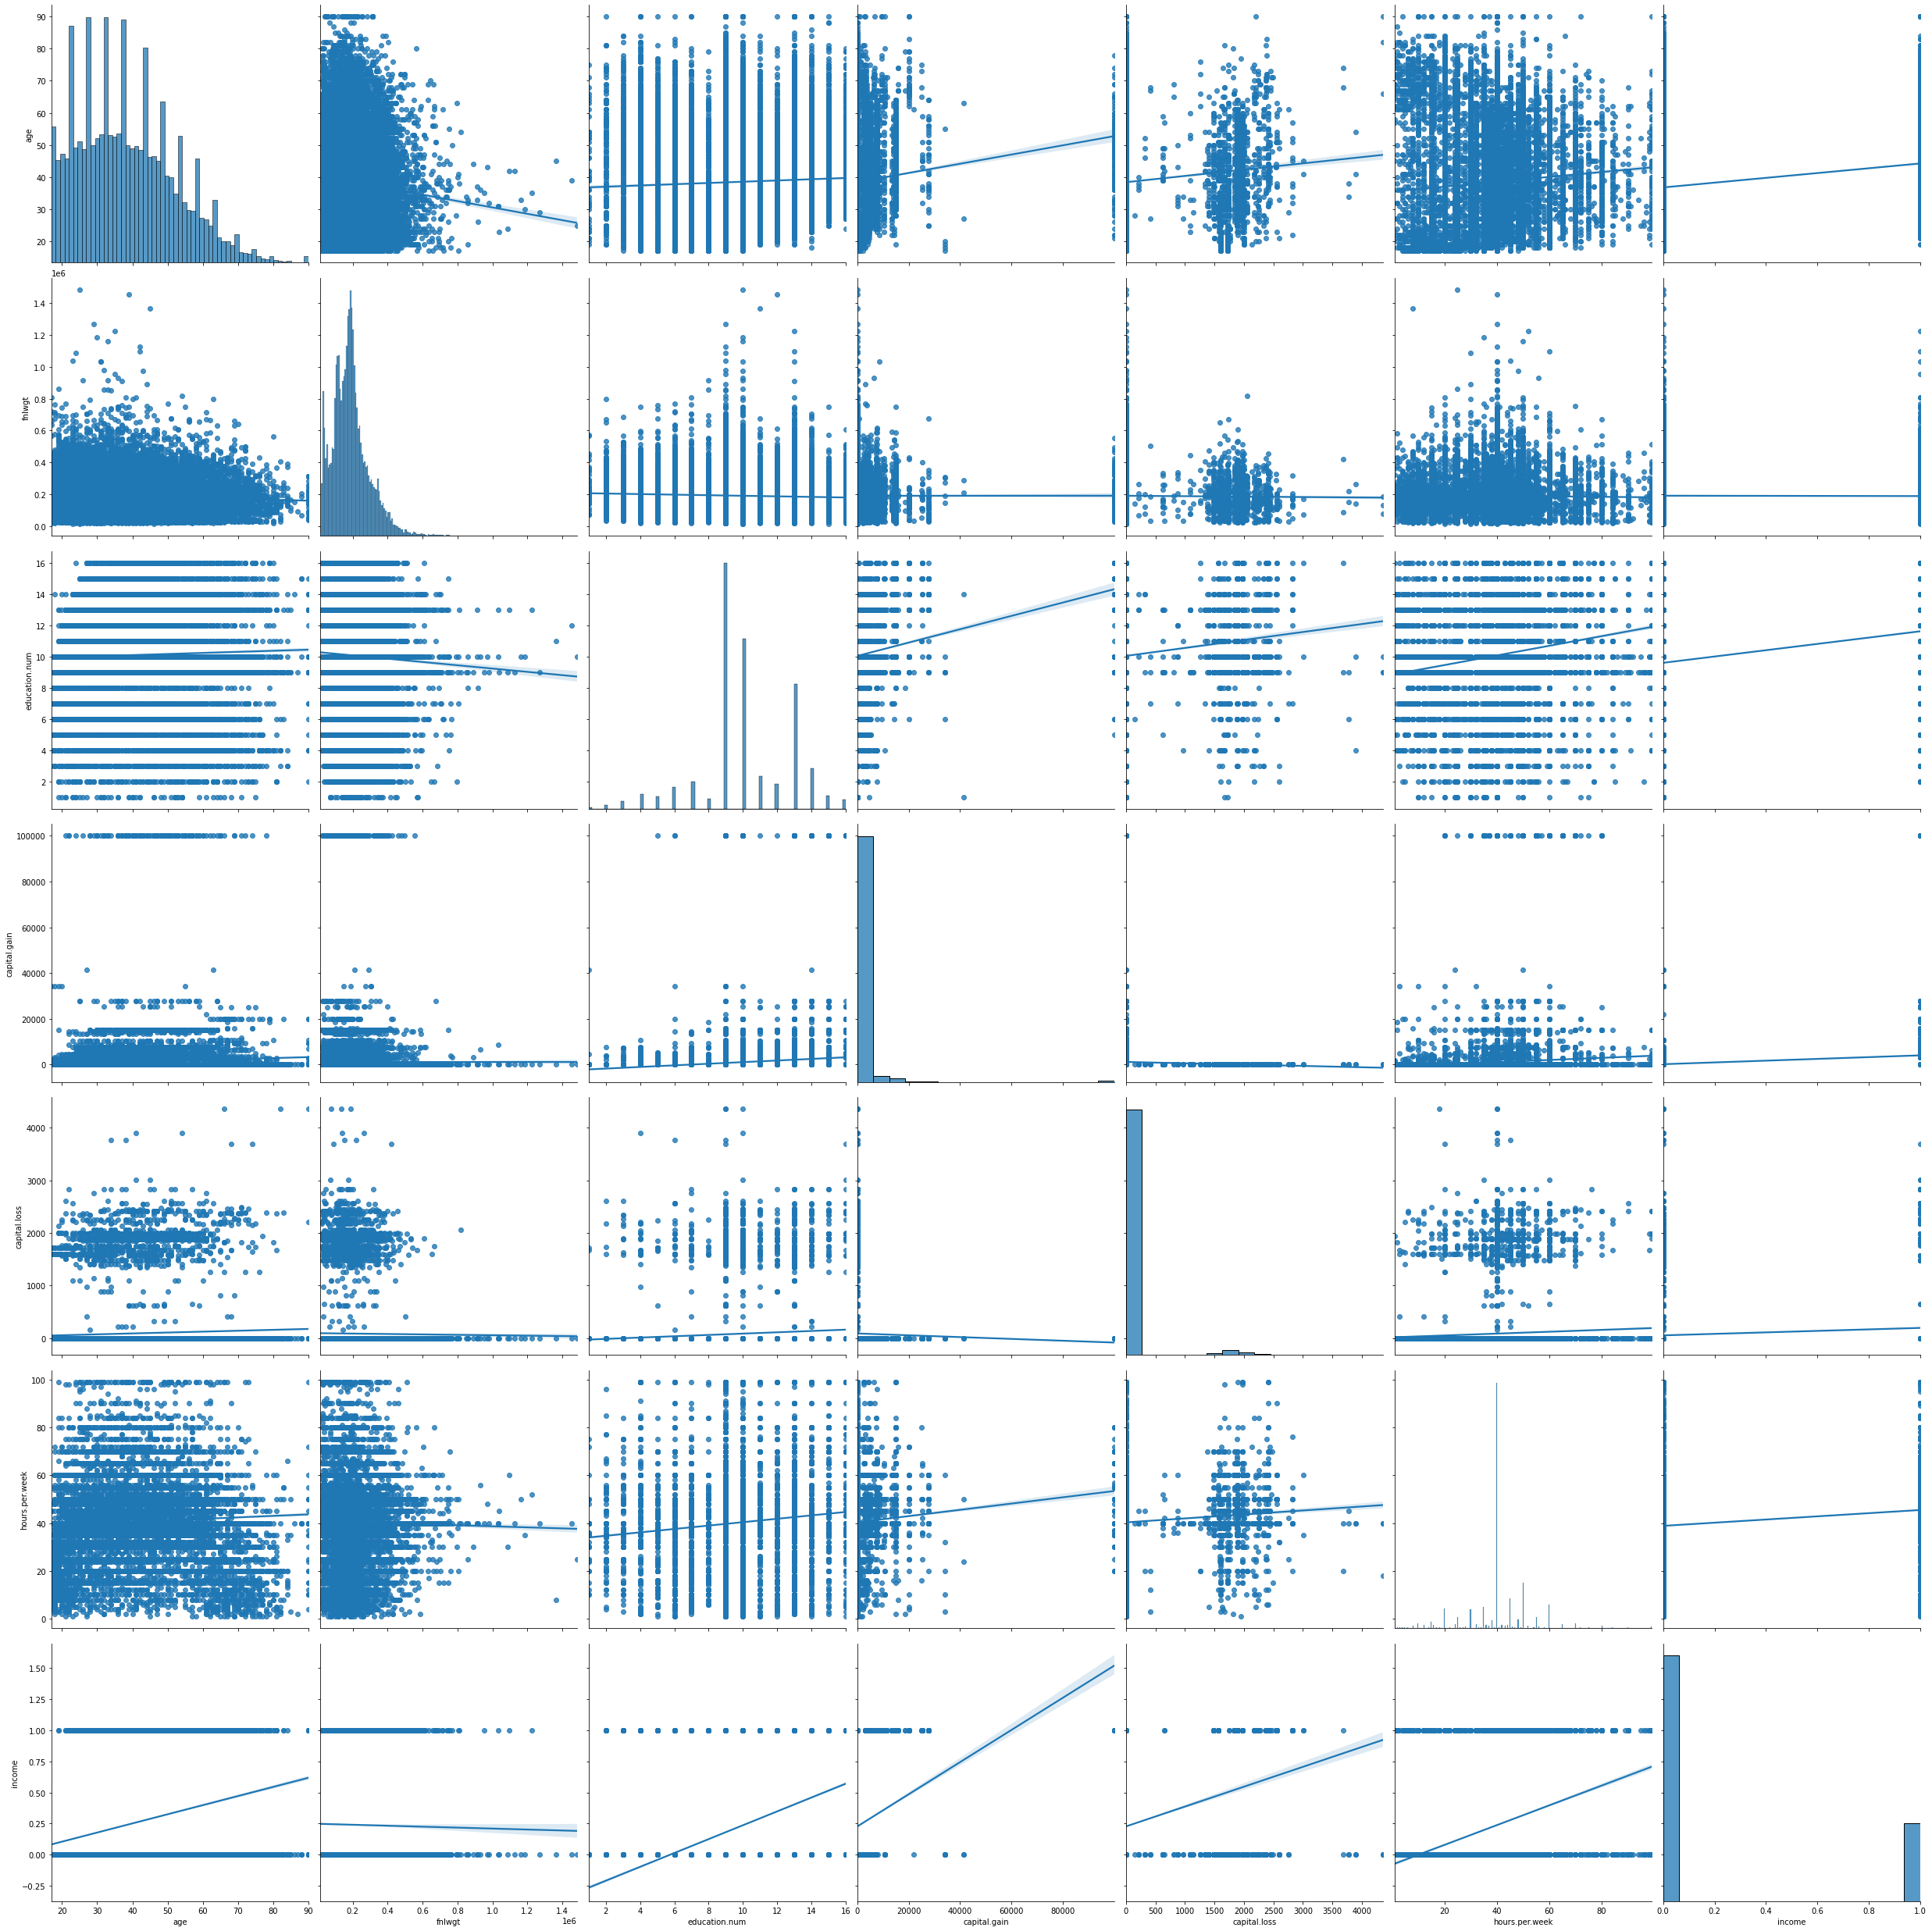

In [21]:
sns.pairplot(data=df,kind='reg',size=5)

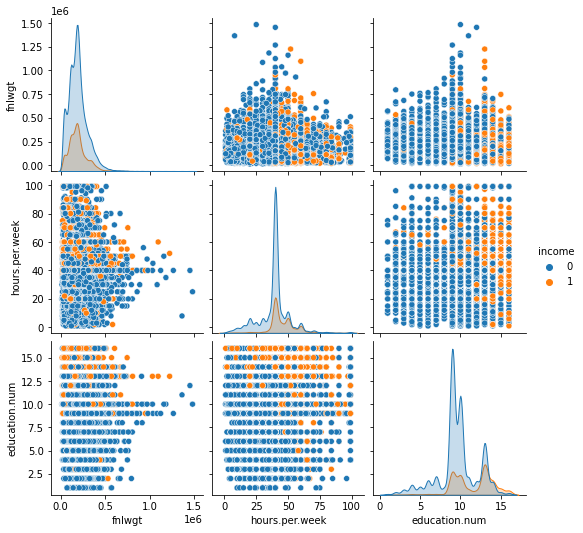

In [22]:
sns.pairplot(df,hue = 'income',vars = ['fnlwgt','hours.per.week','education.num'] )

**Violinplot**

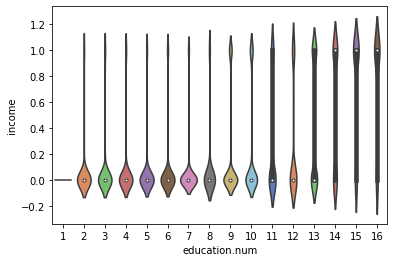

In [23]:
ax = sns.violinplot(x="education.num", y="income", data=df, palette="muted")

In [24]:
df=df.dropna()

# classifying input and output 

In [25]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])

In [26]:
x = df.drop(['income','workclass','education','marital.status','occupation','relationship','race','native.country'],axis=1)
y= df['income']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [27]:
x['income'] = y

In [28]:
cat_ix = x.select_dtypes(include=['object', 'bool']).columns 
num_ix = x.select_dtypes(include=['int64', 'float64']).columns 

# Cross Validation 

In [27]:
seed=101
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('SGDC',SGDClassifier()))
models.append (('CART',DecisionTreeClassifier()))
models.append (('BAG',BaggingClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('GBM',GradientBoostingClassifier()))
results = []
names = []
for name, model in models:
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train,scoring='accuracy',cv=cv,n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.822101 (0.008270)
SGDC: 0.732520 (0.164131)
CART: 0.780185 (0.008333)
BAG: 0.819805 (0.007290)
LR: 0.797429 (0.004911)
GBM: 0.848792 (0.006322)


# 1.Logistic Regression 

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7411
           1       0.72      0.26      0.39      2358

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.79      0.80      0.76      9769

79.80345992425018 %


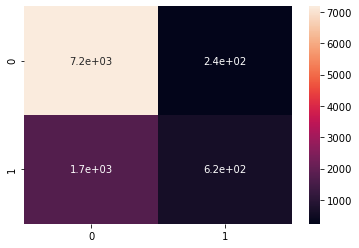

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
print(classification_report(y_test,y_pred))
accuracy1=logistic.score(x_test,y_test)
print (accuracy1*100,'%')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

# 2.Decision Tree Classifier 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7411
           1       0.55      0.55      0.55      2358

    accuracy                           0.78      9769
   macro avg       0.70      0.70      0.70      9769
weighted avg       0.78      0.78      0.78      9769

78.14515303511106 %


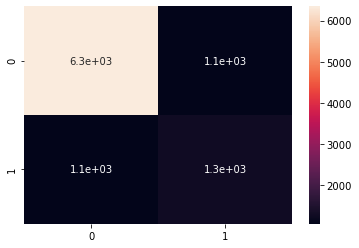

In [29]:
des_class=DecisionTreeClassifier()
des_class.fit(x_train,y_train)
des_predict=des_class.predict(x_test)
print(classification_report(y_test,des_predict))
accuracy3=des_class.score(x_test,y_test)
print(accuracy3*100,'%')
cm = confusion_matrix(y_test, des_predict)
sns.heatmap(cm, annot= True)

# 3.Bagging Classifier 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7411
           1       0.66      0.50      0.57      2358

    accuracy                           0.82      9769
   macro avg       0.76      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

81.84051591769884 %


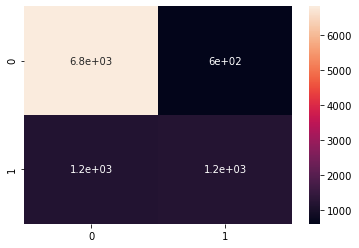

In [30]:
Bag=BaggingClassifier()
Bag.fit(x_train,y_train)
Bag_predict=Bag.predict(x_test)
print(classification_report(y_test,Bag_predict))
accuracy3=Bag.score(x_test,y_test)
print(accuracy3*100,'%')
cm = confusion_matrix(y_test, Bag_predict)
sns.heatmap(cm, annot= True)

# 4.Random Forest classifier 

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7411
           1       0.66      0.54      0.59      2358

    accuracy                           0.82      9769
   macro avg       0.76      0.73      0.74      9769
weighted avg       0.81      0.82      0.81      9769

82.08619101238612 %


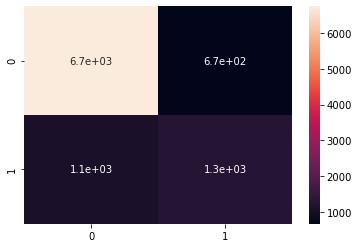

In [31]:
from sklearn.ensemble import RandomForestClassifier 
ran_class=RandomForestClassifier()
ran_class.fit(x_train,y_train)
ran_predict=ran_class.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')
cm = confusion_matrix(y_test, ran_predict)
sns.heatmap(cm, annot= True)

# 5.SGD Classifier

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7411
           1       0.74      0.22      0.34      2358

    accuracy                           0.79      9769
   macro avg       0.77      0.60      0.61      9769
weighted avg       0.78      0.79      0.75      9769

79.32234619715426 %


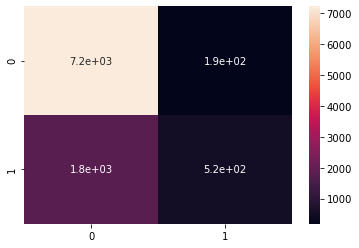

In [32]:
Sgdc=SGDClassifier()
Sgdc.fit(x_train,y_train)
Sgdc_predict=Sgdc.predict(x_test)
print(classification_report(y_test,Sgdc_predict))
accuracy3=Sgdc.score(x_test,y_test)
print(accuracy3*100,'%')
cm = confusion_matrix(y_test, Sgdc_predict)
sns.heatmap(cm, annot= True)

# 6.Gradient Boosting Classifier 

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_predict=gbc.predict(x_test)
print(classification_report(y_test,gbc_predict))
accuracy3=gbc.score(x_test,y_test)
print(accuracy3*100,'%')
cm = confusion_matrix(y_test, gbc_predict)
sns.heatmap(cm, annot= True)

## Fairness

In [29]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [30]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [31]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [32]:
x

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,0,4356,40,0
1,82,132870,9,0,0,4356,18,0
2,66,186061,10,0,0,4356,40,0
3,54,140359,4,0,0,3900,40,0
4,41,264663,10,0,0,3900,40,0
...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,0
32557,27,257302,12,0,0,0,38,0
32558,40,154374,9,1,0,0,40,1
32559,58,151910,9,0,0,0,40,0


In [33]:
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = StandardDataset(x,
                                  label_name='income',
                                  protected_attribute_names=['sex'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

In [34]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.196276


In [39]:
data_orig_train = pd.read_pickle('../../Results/BaggingClassifier/0-adult-census-income-eda-and-prediction-87-35_Train.pkl')
data_orig_test = pd.read_pickle('../../Results/BaggingClassifier/0-adult-census-income-eda-and-prediction-87-35_Test.pkl')

In [40]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.ensemble import BaggingClassifier
import pickle

#data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 10

model = BaggingClassifier(random_state=0,n_estimators=10)

'''
mdl = model.fit(X_train, y_train)
with open('../../Results/BaggingClassifier/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/BaggingClassifier/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/BaggingClassifier/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) '''

"\nmdl = model.fit(X_train, y_train)\nwith open('../../Results/BaggingClassifier/' + nb_fname + '.pkl', 'wb') as f:\n        pickle.dump(mdl, f)\n\nwith open('../../Results/BaggingClassifier/' + nb_fname + '_Train' + '.pkl', 'wb') as f:\n    pickle.dump(data_orig_train, f) \n    \nwith open('../../Results/BaggingClassifier/' + nb_fname + '_Test' + '.pkl', 'wb') as f:\n    pickle.dump(data_orig_test, f) "

In [41]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = BaggingClassifier(random_state=0,n_estimators=i)

    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [42]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
#final_result.to_csv('../../Results/BaggingClassifier/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
accuracy,0.843382,0.805610,0.831098,0.826799,0.836421,0.832839,0.837752,0.836012,0.841949,0.838673,0.843382
f1,0.646488,0.606751,0.582912,0.635659,0.613262,0.644459,0.626620,0.650066,0.641431,0.656045,0.646488
statistical_parity_difference,-0.175404,-0.183127,-0.132379,-0.191827,-0.158836,-0.189114,-0.167796,-0.192831,-0.170189,-0.196218,-0.175404
equal_opportunity_difference,-0.151871,-0.104359,-0.103098,-0.122256,-0.132274,-0.130454,-0.142120,-0.137556,-0.145960,-0.157455,-0.151871
average_abs_odds_difference,0.111202,0.100197,0.074653,0.109282,0.098356,0.109896,0.105642,0.114344,0.106377,0.123654,0.111202
disparate_impact,-1.146355,-0.888981,-1.039518,-1.051256,-1.158085,-1.063882,-1.145139,-1.104033,-1.115730,-1.128929,-1.146355
theil_index,0.126990,0.131891,0.151545,0.125373,0.140247,0.123328,0.134555,0.121729,0.128947,0.119678,0.126990
